In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("../")

In [2]:
import echidna as ec
ec.pl.activate_plot_settings()

%load_ext autoreload
%autoreload 2

In [3]:
adata = sc.read_h5ad("data/F01_on_processed.h5")
wdf = pd.read_csv("data/wgs_F01_cellranger.csv", index_col="gene")

In [4]:
# W has two out of order timepoints. I will index for "on" later.
wdf.head()

,on_count,pre_count
gene,,
HES4,0.141322,0.141322
ISG15,1.000000,1.000000
AL645608.1,1.000000,1.000000
AGRN,1.000000,1.000000
AL645608.5,1.000000,1.000000


Pre-process your data if necessary. I've already run this step and saved the processed AnnData.

In [5]:
# ec.tl.pre_process(adata, filepath="data/F01_on_processed.h5")

Specify the parameters for your training run, model hyperparameters, and the labels in your AnnData that Echidna should use to construct the data for modeling.

2024-07-07 03:51:19,423 | INFO : Added `.obs['echidna_split']`: the Echidna train/validation split.
 1002 cells in validation set.
2024-07-07 03:51:19,434 | INFO : Added `.var[echidna_matched_genes]` : Labled True for genes contained in W.
2024-07-07 03:51:19,441 | INFO : Added `.var[echidna_W_on_count]` : CN entries for genes contained in W.
training loss: 0.3118 | validation loss: 0.0487:  11%| | 109/1000 [00:24<03:19, 
2024-07-07 03:51:49,358 | INFO : Early stopping has been triggered.


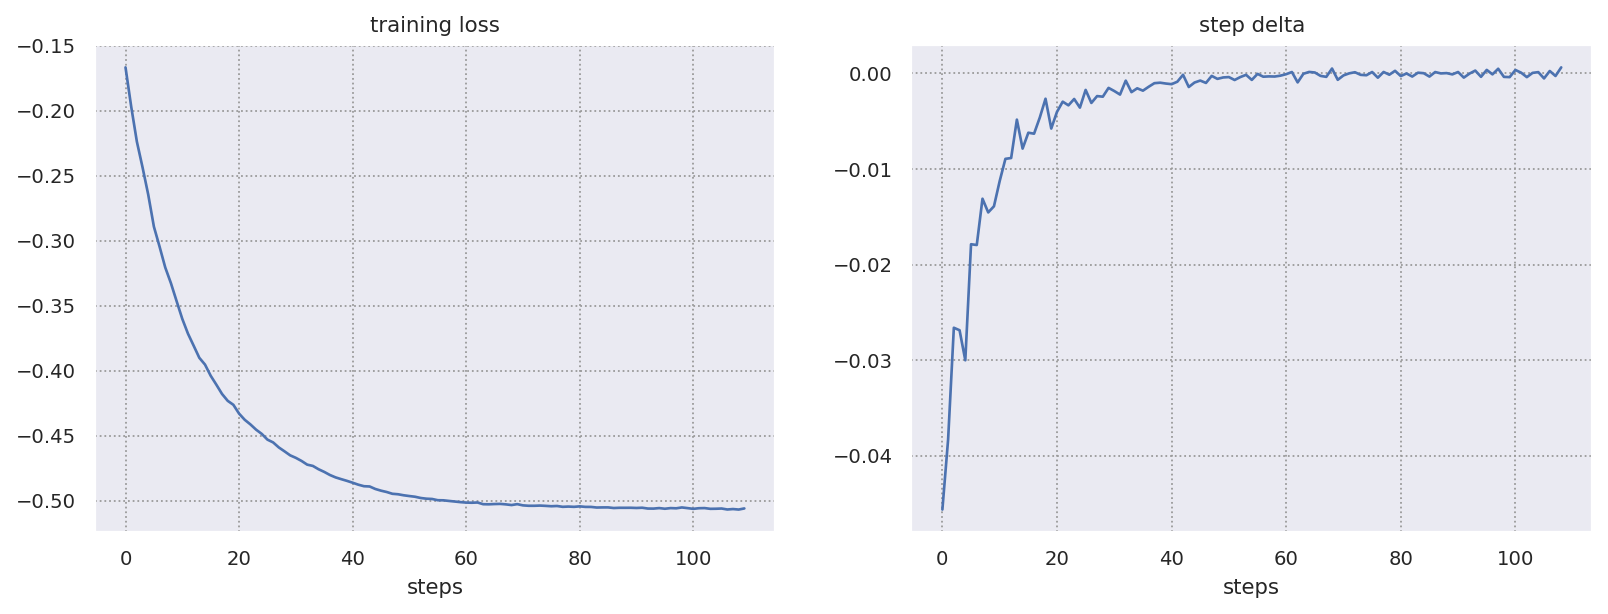

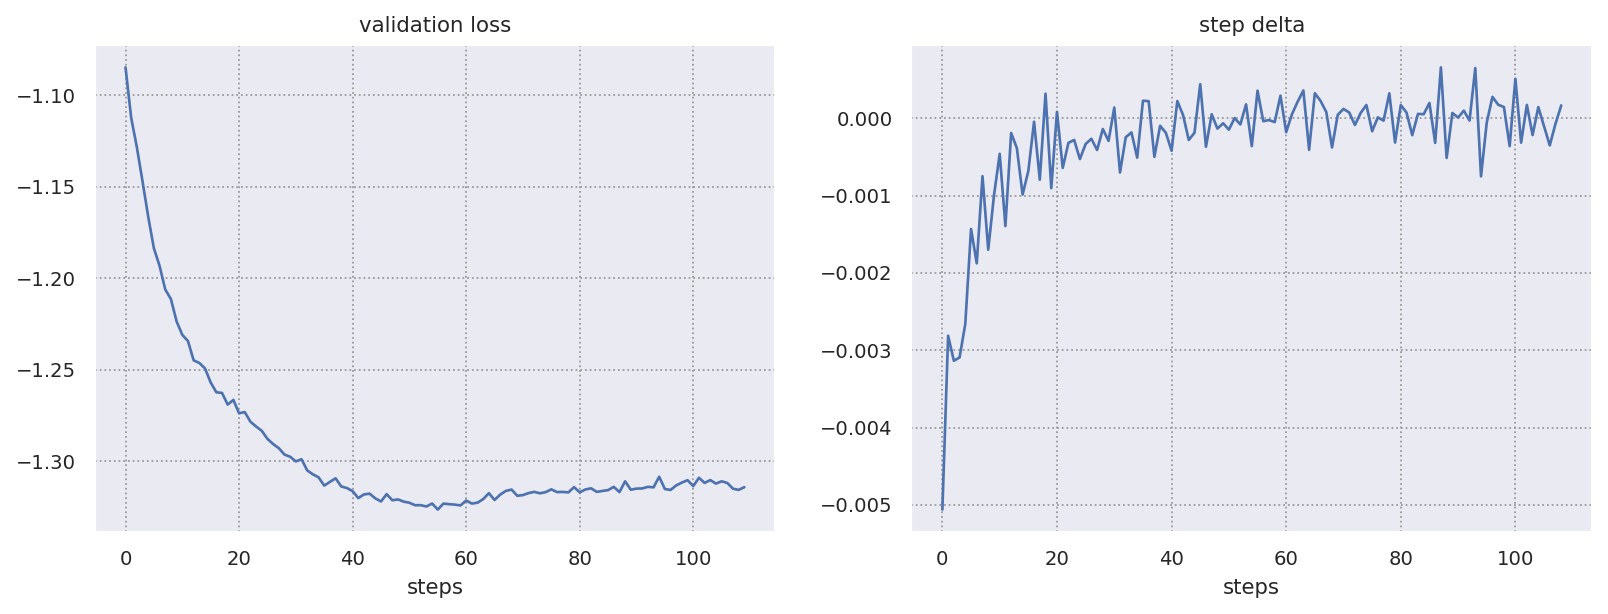

2024-07-07 03:52:21,148 | INFO : Saving echidna model with run_id 20240707-035221.


In [6]:
config = ec.tl.EchidnaConfig(
    timepoint_label = "timepoint",
    counts_layer = "counts",
    clusters = "pheno_leiden",
    inverse_gamma = True,
    eta_mean_init = 2.,
    patience = 50,
    n_steps = 1000,
)
ec.tl.echidna_train(
     adata # single cell anndata
    , wdf.loc[:,"on_count"] # copy number pandas dataframe, indexed with genes
    , config # config settings
)

In [7]:
ec.tl.echidna_clones(adata)

2024-07-07 03:52:21,579 | INFO : Dendrogram knee point: 8
2024-07-07 03:52:21,580 | INFO : Dendrogram threshold: 0.5526
2024-07-07 03:52:21,841 | INFO : Added `.obs['echidna_clones']`: the learned clones from eta.


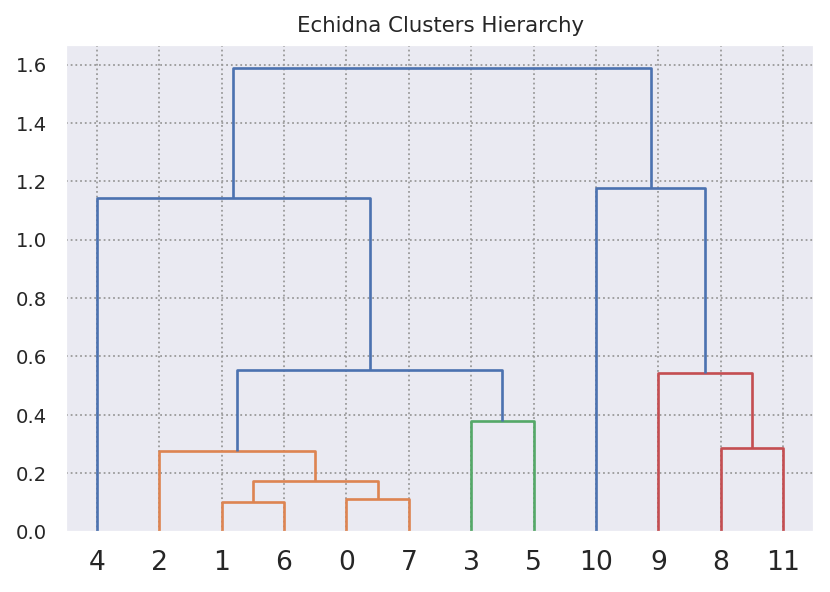

In [8]:
ec.pl.dendrogram(adata)

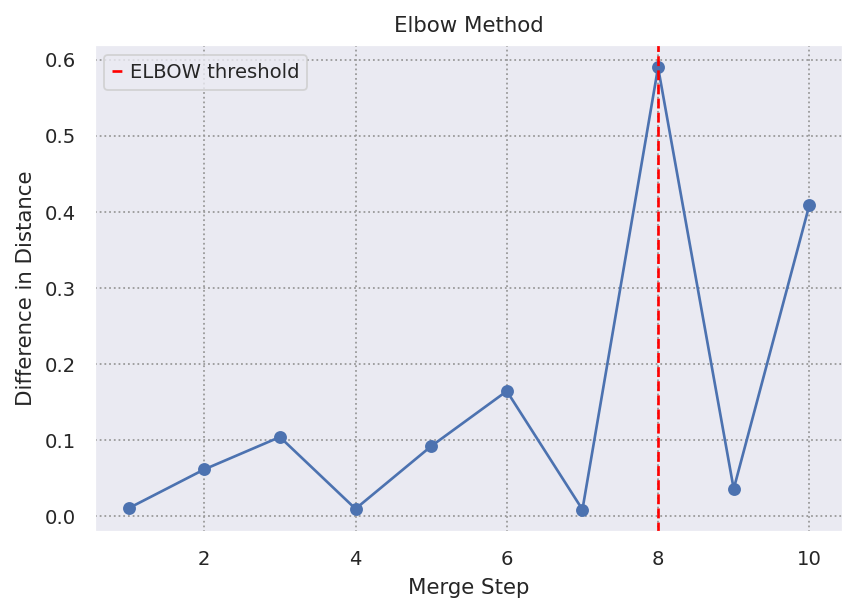

In [9]:
ec.pl.dendrogram(adata, elbow=True)

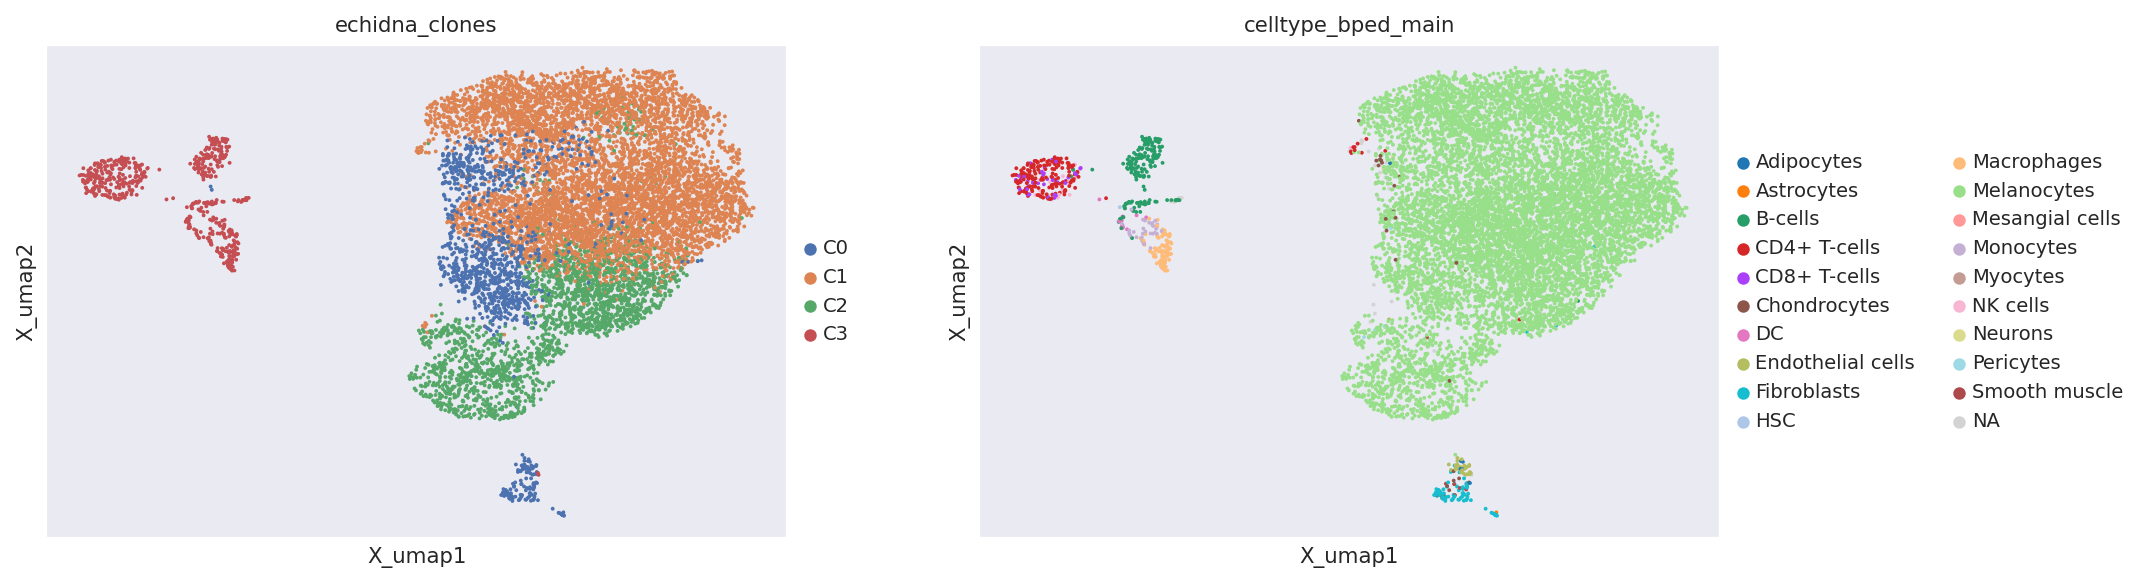

In [10]:
ec.pl.echidna(adata, ["echidna_clones", "celltype_bped_main"])

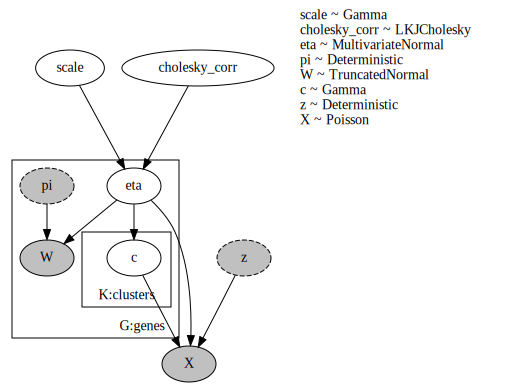

In [11]:
ec.pl.plate_model(adata)

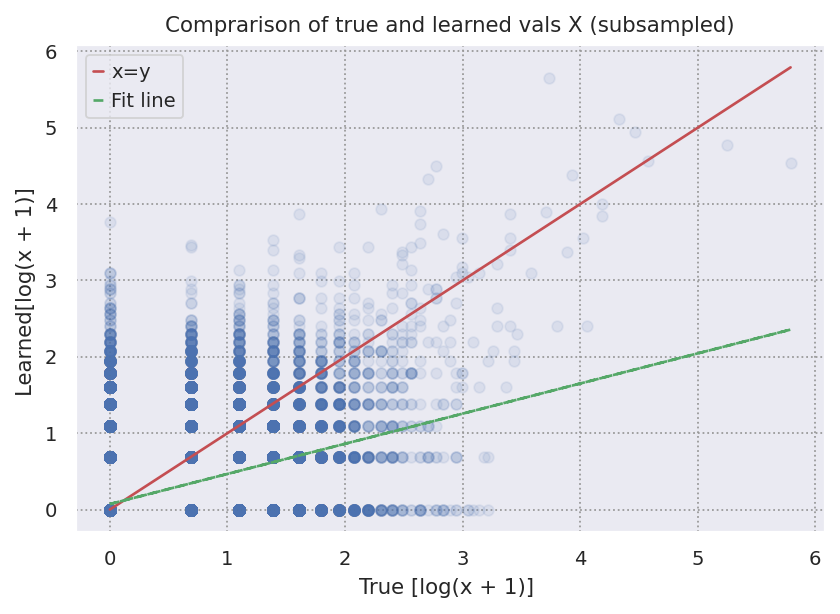

In [12]:
ec.pl.ppc(adata, "X")

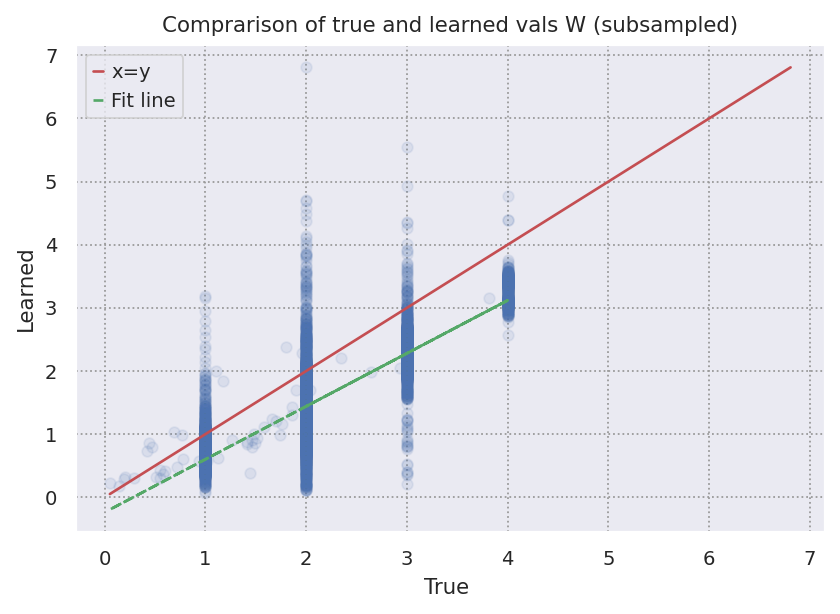

In [13]:
ec.pl.ppc(adata, "W")

training loss: 0.3332 | validation loss: 0.0480:  10%| | 103/1000 [00:20<02:59, 
2024-07-07 03:53:18,234 | INFO : Early stopping has been triggered.


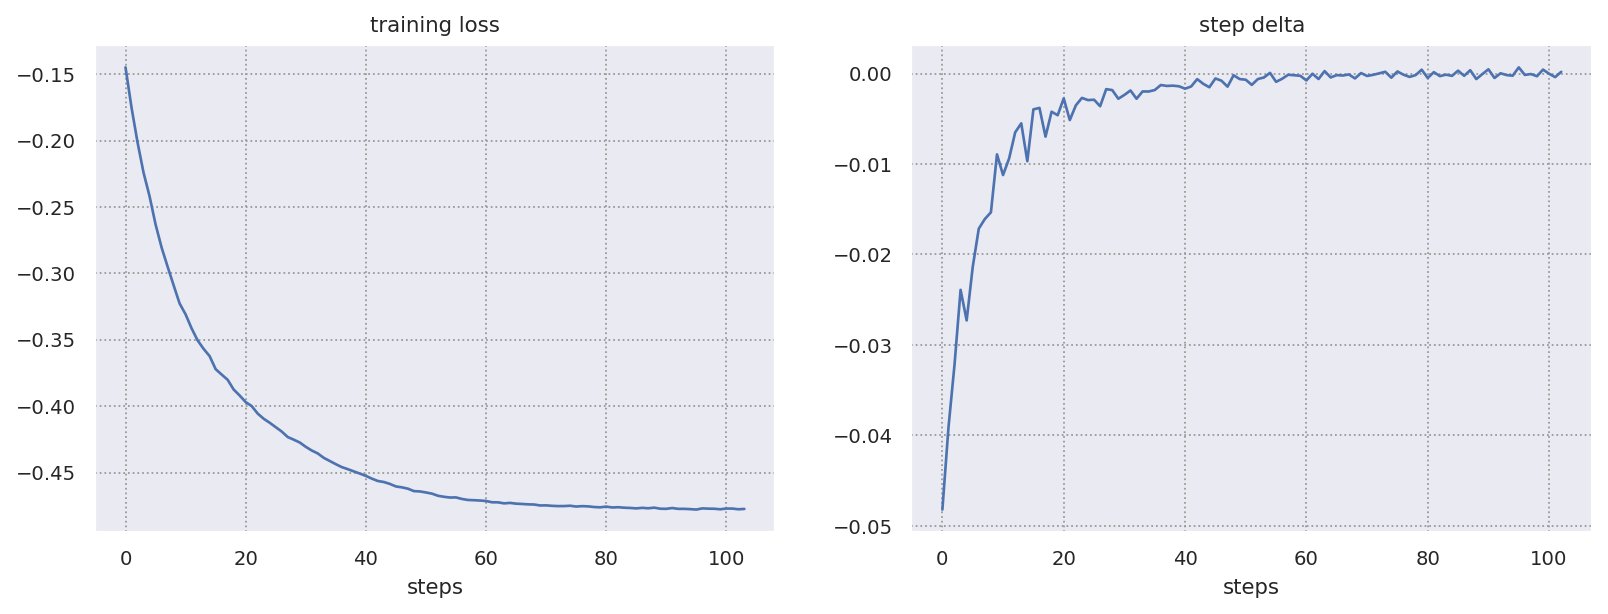

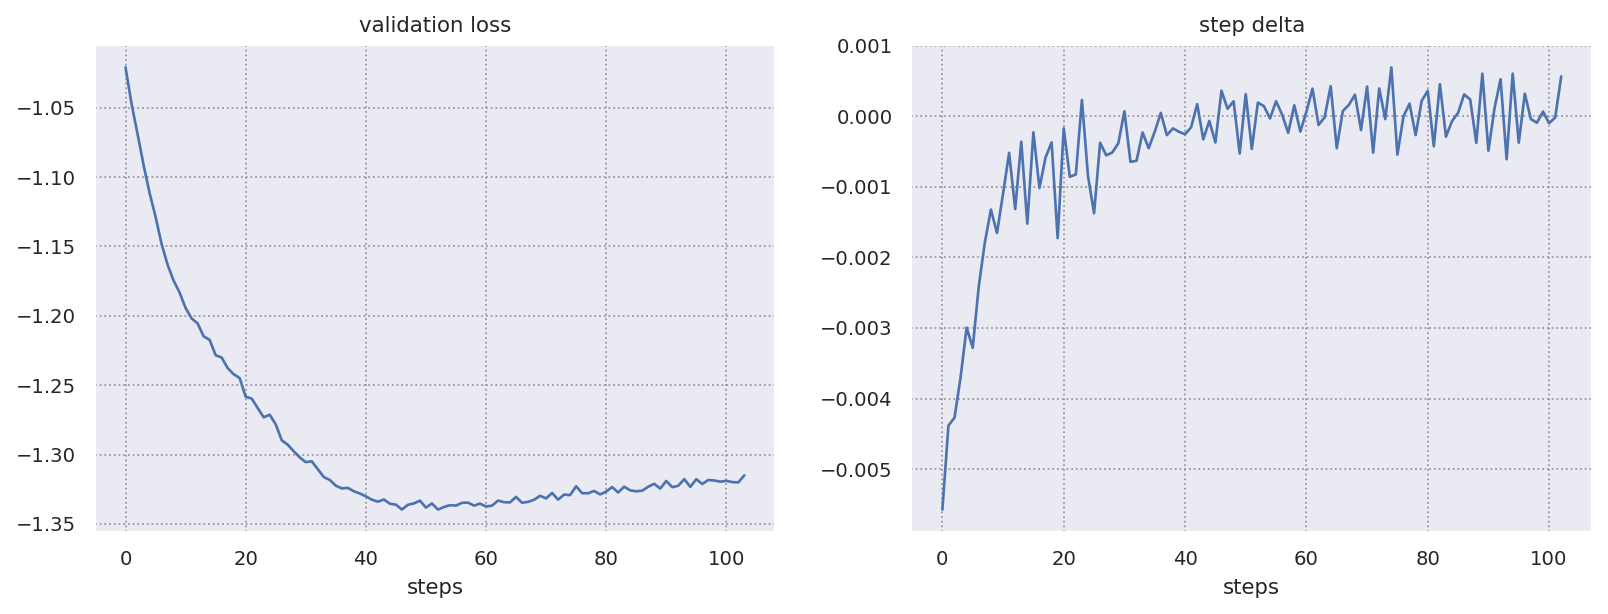

2024-07-07 03:53:47,565 | INFO : Saving echidna model with run_id 20240707-035347.


In [14]:
ec.tl.simulate(adata)

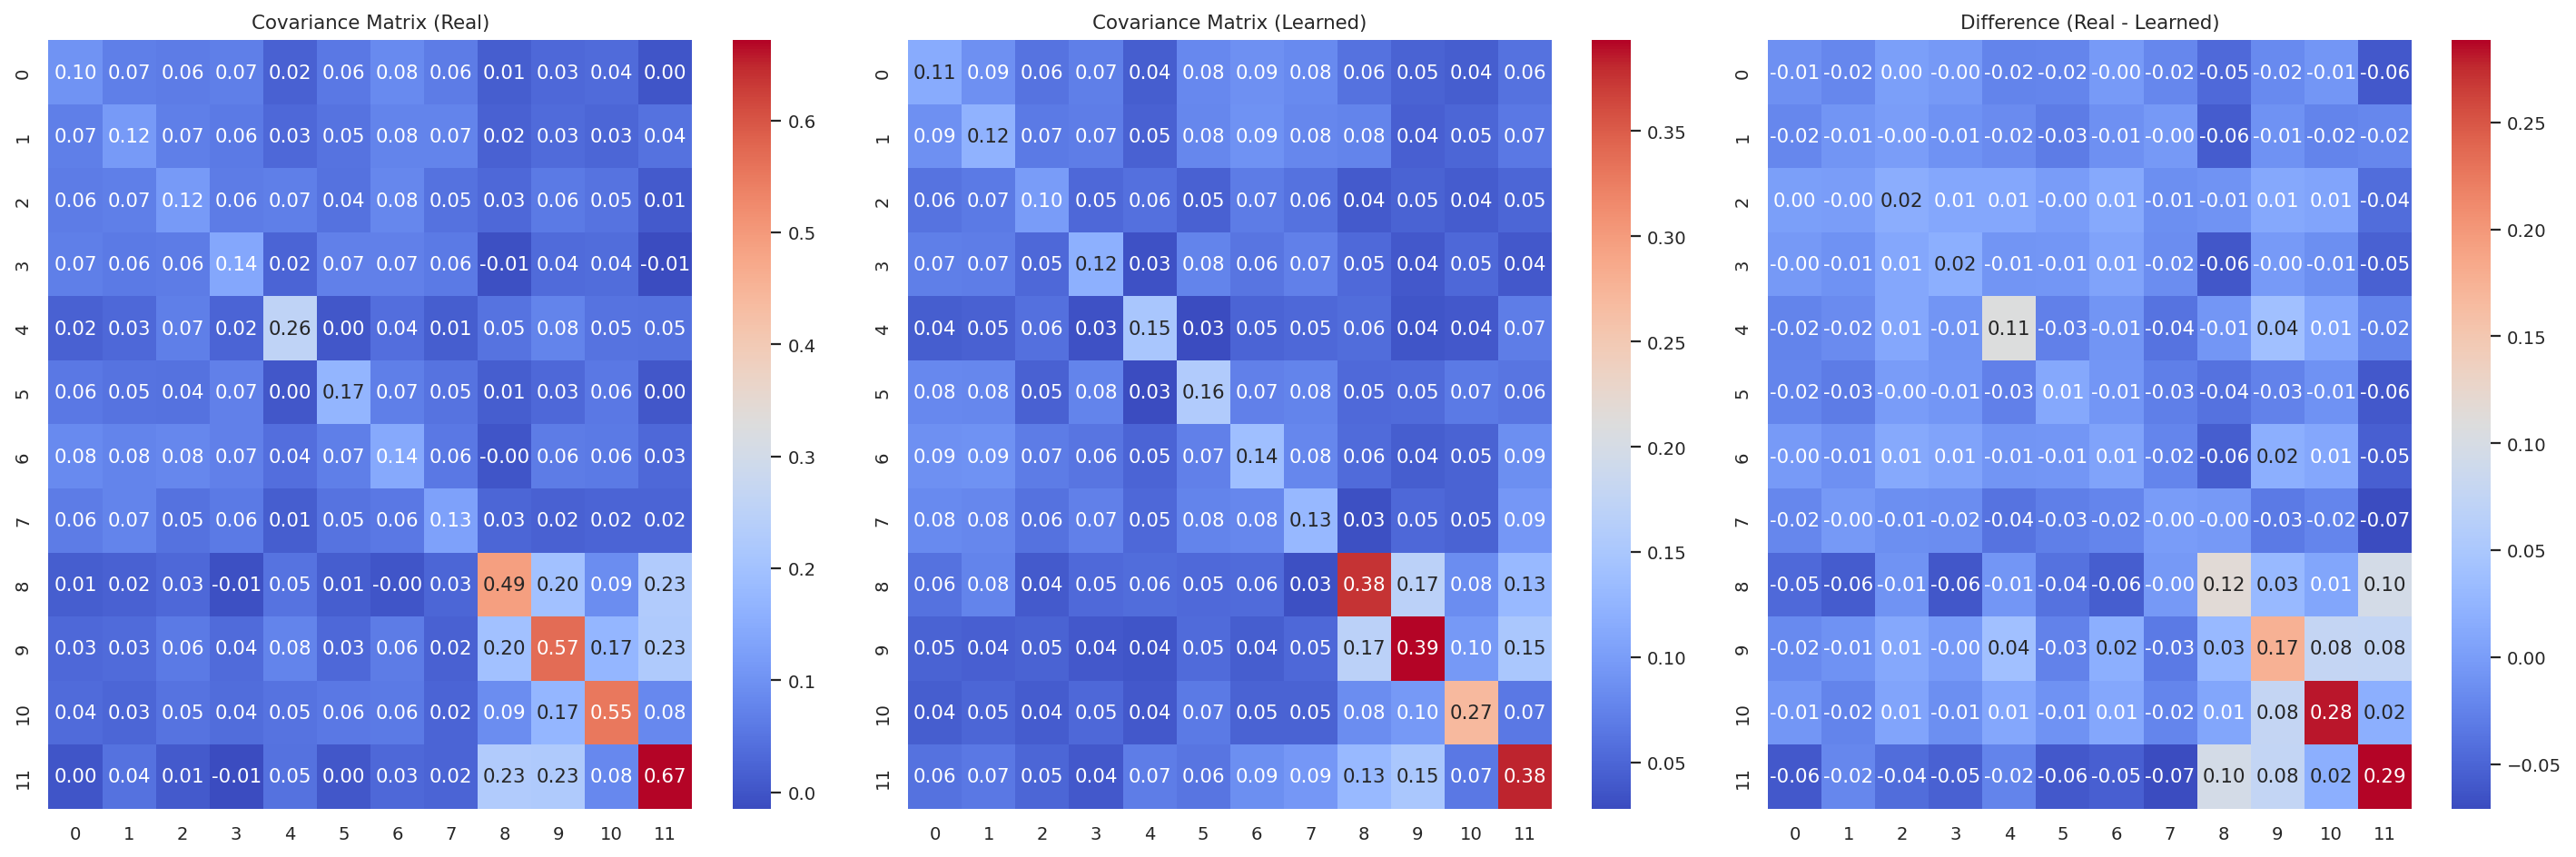

In [15]:
ec.pl.ppc(adata, "cov")

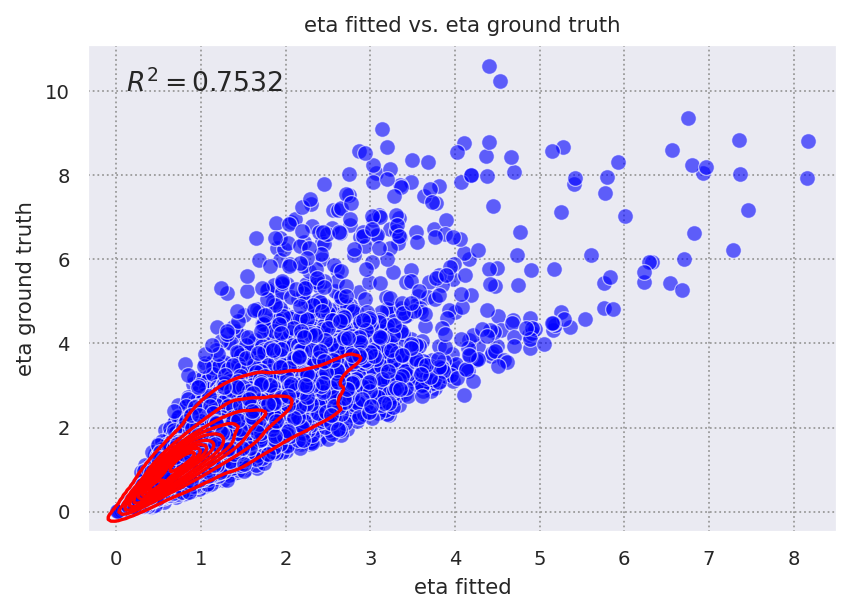

In [16]:
ec.pl.ppc(adata, "eta")

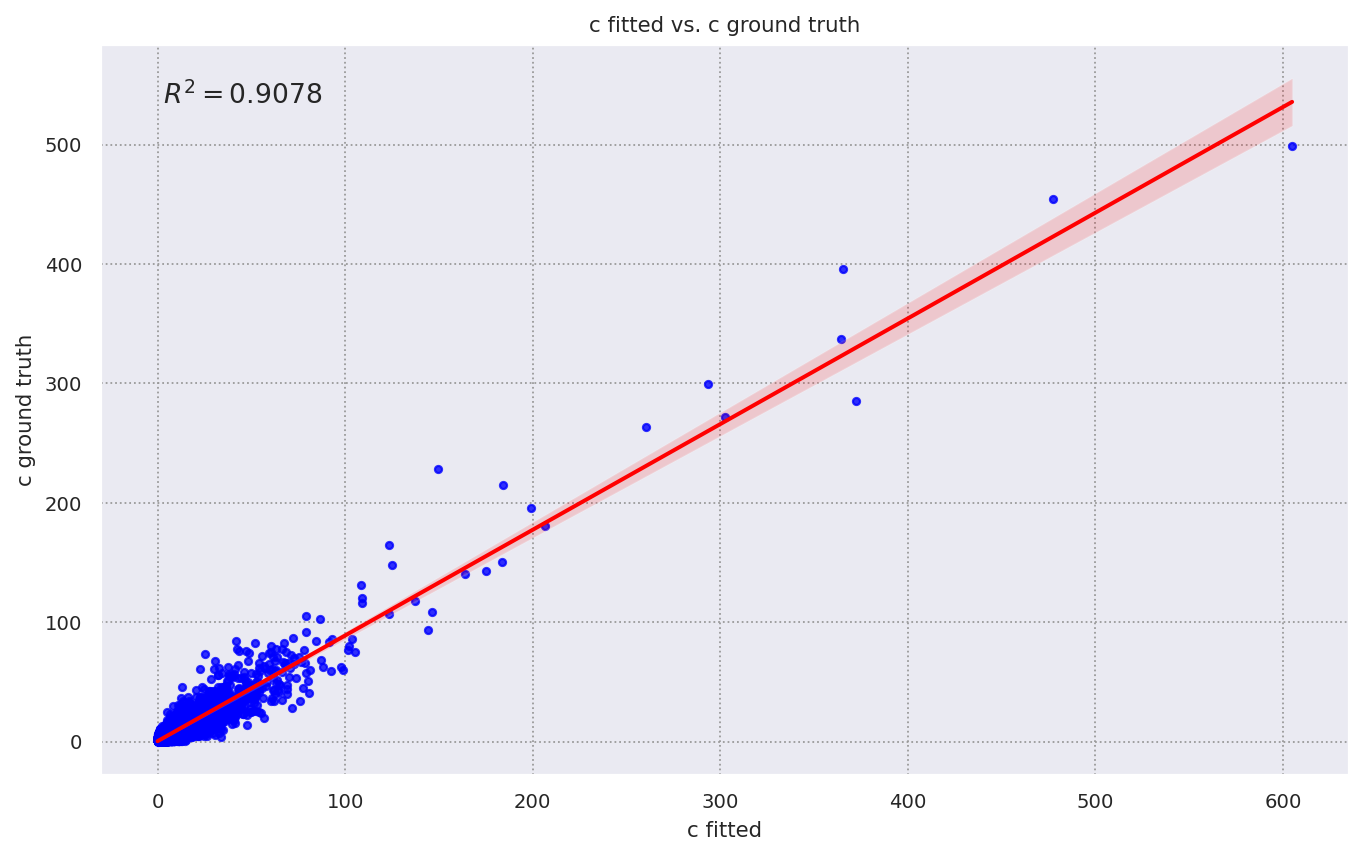

In [18]:
ec.pl.ppc(adata, "c")

In [17]:
ec.tl.sample(adata, "W")

tensor([0.3019, 0.6032, 0.6160,  ..., 2.1997, 2.1498, 2.1163], device='cuda:0')